**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [6]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [7]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [8]:
from scipy.optimize import minimize

# Define price grid and wage
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
w = 1

# Define the optimal labor and production functions for firm
def optimal_labor(p):
    return (p * par.A * par.gamma / w) ** (1 / (1 - par.gamma))

def optimal_production(l):
    return par.A * (l ** par.gamma)

# Define the implied profits function
def optimal_profits(p):
    return (1 - par.gamma) / par.gamma * w * (p * par.A * par.gamma / w) ** (1 / (1 - par.gamma))

# Define the utility function to maximize
def utility(l, p1, p2):
    c1 = par.alpha * (w * l + optimal_labor(p1) + optimal_labor(p2) + par.T) / p1
    c2 = (1 - par.alpha) * (w * l + optimal_labor(p1) + optimal_labor(p2) + par.T) / (p2 + par.tau)
    return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * (l ** (1 + par.epsilon)) / (1 + par.epsilon)

# Define a function to find the optimal labor supply
def find_optimal_labor_supply(p1, p2):
    result = minimize(lambda l: -utility(l, p1, p2), 1.0, bounds=[(0, None)])
    return result.x[0]

# Market clearing conditions
def market_clearing_conditions(p1, p2):
    # Optimal labor for both firms
    l1_star = optimal_labor(p1)
    l2_star = optimal_labor(p2)

    # Optimal production for both firms
    y1_star = optimal_production(l1_star)
    y2_star = optimal_production(l2_star)

    # Implied profits for both firms
    pi1_star = optimal_profits(p1)
    pi2_star = optimal_profits(p2)

    # Total income
    total_income = w * (l1_star + l2_star) + pi1_star + pi2_star + par.T

    # Find the optimal labor supply for the consumer
    l_star = find_optimal_labor_supply(p1, p2)

    # Optimal consumption for the consumer
    c1_star = par.alpha * total_income / p1
    c2_star = (1 - par.alpha) * total_income / (p2 + par.tau)

    # Check market clearing conditions
    labor_market_clearing = np.isclose(l_star, l1_star + l2_star)
    good1_market_clearing = np.isclose(c1_star, y1_star)
    good2_market_clearing = np.isclose(c2_star, y2_star)
    
    return labor_market_clearing, good1_market_clearing, good2_market_clearing

# Check market clearing conditions
results = []
for p1 in p1_values:
    for p2 in p2_values:
        labor_clearing, good1_clearing, good2_clearing = market_clearing_conditions(p1, p2)
        if labor_clearing and good1_clearing and good2_clearing:
            results.append((p1, p2, labor_clearing, good1_clearing, good2_clearing))

# Print the results where both good1 and good2 markets clear
if results:
    for result in results:
        print(result)
else:
    print("No results where both goods markets clear.")

No results where both goods markets clear.


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [9]:
from scipy.optimize import minimize

# Market clearing function to solve
def market_clearing(prices):
    p1, p2 = prices
    
    
    # Optimal labor for both firms
    l1_star = optimal_labor(p1)
    l2_star = optimal_labor(p2)

    # Optimal production for both firms
    y1_star = optimal_production(l1_star)
    y2_star = optimal_production(l2_star)

    # Implied profits for both firms
    pi1_star = optimal_profits(p1)
    pi2_star = optimal_profits(p2)

    # Total income
    total_income = w * (l1_star + l2_star) + pi1_star + pi2_star + par.T

    l_star = find_optimal_labor_supply(p1, p2)

    # Optimal consumption for the consumer
    c1_star = par.alpha * total_income / p1
    c2_star = (1 - par.alpha) * total_income / (p2 + par.tau)

    # Market clearing conditions for good 1 and good 2
    labor_market_clearing = l_star - (l1_star + l2_star)
    good1_clearing = c1_star - y1_star
    
    return np.abs(labor_market_clearing) + np.abs(good1_clearing)

# Initial guess for prices
initial_guess = [1, 1]

# Find the equilibrium prices using fsolve
equilibrium_prices = minimize(market_clearing, initial_guess, bounds=[(0.1, 2.0),(0.1, 2.0)])

# Extract the equilibrium prices
p1_eq, p2_eq = equilibrium_prices.x

print(f'Equilibrium prices: p1 = {p1_eq:.2f}, p2 = {p2_eq:.2f}')
l_star = find_optimal_labor_supply(p1_eq, p2_eq)
eq_utility=utility(l_star,p1_eq,p2_eq)
print("utility=",eq_utility)

Equilibrium prices: p1 = 0.99, p2 = 1.51
utility= -0.5874957815156424


In [12]:
import numpy as np
from scipy.optimize import fsolve


# Firm behavior functions
def firm_labor_demand(w, p_j):
    return (p_j * par.A * par.gamma / w) ** (1 / (1 - par.gamma))

def firm_output(w, p_j):
    return par.A * (firm_labor_demand(w, p_j)) ** par.gamma

def firm_profits(w, p_j):
    return (1 - par.gamma) / par.gamma * w * firm_labor_demand(w, p_j)

# Consumer behavior functions
def consumer_c1(w, p1, p2, pi1, pi2, ell):
    return par.alpha * (w * ell + pi1 + pi2) / p1

def consumer_c2(w, p1, p2, pi1, pi2, ell):
    return (1 - par.alpha) * (w * ell + pi1 + pi2) / p2

def utility(w, p1, p2, ell):
    pi1 = firm_profits(w, p1)
    pi2 = firm_profits(w, p2)
    c1 = consumer_c1(w, p1, p2, pi1, pi2, ell)
    c2 = consumer_c2(w, p1, p2, pi1, pi2, ell)
    return np.log(c1 ** par.alpha * c2 ** (1 - par.alpha)) - par.nu * ell ** (1 + par.epsilon) / (1 + par.epsilon)

# Optimal labor supply
def optimal_labor(w, p1, p2):
    pi1 = firm_profits(w, p1)
    pi2 = firm_profits(w, p2)
    
    def objective(ell):
        return -utility(w, p1, p2, ell)
    
    result = fsolve(objective, 1.0)
    return result[0]

# Market clearing conditions
def market_clearing(prices):
    p1, p2 = prices
    w = 1.0  # Normalize wage to 1
    ell_star = optimal_labor(w, p1, p2)
    pi1 = firm_profits(w, p1)
    pi2 = firm_profits(w, p2)
    
    # Labor market clearing
    ell1 = firm_labor_demand(w, p1)
    ell2 = firm_labor_demand(w, p2)
    labor_market = ell_star - (ell1 + ell2)
    
    # Goods market clearing
    y1 = firm_output(w, p1)
    y2 = firm_output(w, p2)
    
    c1 = consumer_c1(w, p1, p2, pi1, pi2, ell_star)
    c2 = consumer_c2(w, p1, p2, pi1, pi2, ell_star)
    
    goods_market_1 = c1 - y1
    goods_market_2 = c2 - y2
    
    return [goods_market_1, goods_market_2]

# Solve for equilibrium prices
initial_guess = [0.5, 1.5]
equilibrium_prices = fsolve(market_clearing, initial_guess)

p1_star, p2_star = equilibrium_prices

print(f'Optimal price for good 1: {p1_star}')
print(f'Optimal price for good 2: {p2_star}')

Optimal price for good 1: 0.975815023104947
Optimal price for good 2: 1.490582069217834


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [13]:
# Social welfare function
def social_welfare(tau, p1_eq, p2_eq, kappa):
    # Update parameters
    par.tau = tau
    

    # Optimal labor for both firms
    l1_star = optimal_labor(p1_eq)
    l2_star = optimal_labor(p2_eq)

    # Optimal production for both firms
    y1_star = optimal_production(l1_star)
    y2_star = optimal_production(l2_star)

    # Implied profits for both firms
    pi1_star = optimal_profits(p1_eq)
    pi2_star = optimal_profits(p2_eq)

    # Total income
    total_income = w * (l1_star + l2_star) + pi1_star + pi2_star + par.T

    # Optimal consumption for the consumer
    c1_star = par.alpha * total_income / p1
    c2_star = (1 - par.alpha) * total_income / (p2 + par.tau)
    par.T = par.tau*c2_star

    # Total labor supply
    l_star = l1_star + l2_star

    # Utility
    utility_value = np.log(c1_star**par.alpha * c2_star**(1 - par.alpha)) - par.nu * (l_star**(1 + par.epsilon)) / (1 + par.epsilon)

    # Social welfare function
    swf = utility_value - kappa * y2_star

    return -swf  # We negate the SWF for minimization purposes

# Initial guess for tau 
initial_guess = [1]

# Define kappa
kappa = 0.1

# Find the optimal tau and T
opt_result = minimize(social_welfare, initial_guess, args=(p1_eq, p2_eq, kappa))

# Extract the optimal tau and T
optimal_tau = opt_result.x
optimal_T = optimal_tau * c2_star

print(f'Optimal tau: {optimal_tau}, Optimal T: {optimal_T}')



TypeError: optimal_labor() missing 2 required positional arguments: 'p1' and 'p2'

In [ ]:
from scipy.optimize import minimize

# Social welfare function
def social_welfare(params, p1_eq, p2_eq, kappa):
    tau, T = params

    # Update parameters
    par.tau = tau
    par.T = T

    # Optimal labor for both firms
    l1_star = optimal_labor(p1_eq)
    l2_star = optimal_labor(p2_eq)

    # Optimal production for both firms
    y1_star = optimal_production(l1_star)
    y2_star = optimal_production(l2_star)

    # Implied profits for both firms
    pi1_star = optimal_profits(p1_eq)
    pi2_star = optimal_profits(p2_eq)

    # Total income
    total_income = w * (l1_star + l2_star) + pi1_star + pi2_star + T

    # Optimal consumption for the consumer
    c1_star = par.alpha * total_income / p1_eq
    c2_star = (1 - par.alpha) * total_income / (p2_eq + tau)

    # Total labor supply
    l_star = l1_star + l2_star

    # Utility
    utility_value = np.log(c1_star**par.alpha * c2_star**(1 - par.alpha)) - par.nu * (l_star**(1 + par.epsilon)) / (1 + par.epsilon)

    # Social welfare function
    swf = utility_value - kappa * y2_star

    return -swf  # We negate the SWF for minimization purposes

# Initial guess for tau and T
initial_guess = [0.0, 0.0]

# Define kappa
kappa = 0.1

# Find the optimal tau and T
opt_result = minimize(social_welfare, initial_guess, args=(p1_eq, p2_eq, kappa), bounds=[(0, 2), (0, 2)])

# Extract the optimal tau and T
optimal_tau, optimal_T = opt_result.x

print(f'Optimal tau: {optimal_tau}, Optimal T: {optimal_T}')


Optimal tau: 0.0, Optimal T: 2.0


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [26]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [ ]:
import pandas as pd
# Function to calculate expected and realized utilities
def calculate_utilities():
    # Initialize arrays to store utilities
    expected_utilities = np.zeros(par.J)
    realized_utilities = np.zeros(par.J)

# Calculate expected and realized utilities for each career track
    for j in range(par.J):
        # Simulate K values of epsilon for career track j
        epsilon_ij = np.random.normal(0, par.sigma, par.K)
        # Calculate expected utility for career track j
        expected_utilities[j] = par.v[j]
        # Calculate realized utility for career track j
        realized_utilities[j] = par.v[j] + np.mean(epsilon_ij)

    return expected_utilities, realized_utilities

# Calculate utilities
expected_utilities, realized_utilities = calculate_utilities()

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Career Track': np.arange(par.J) + 1,
    'Average Expected Utility': expected_utilities,
    'Average Realized Utility': realized_utilities
})

print(result_df)



   Career Track  Average Expected Utility  Average Realized Utility
0             1                       1.0                  0.995728
1             2                       2.0                  2.027068
2             3                       3.0                  2.975074


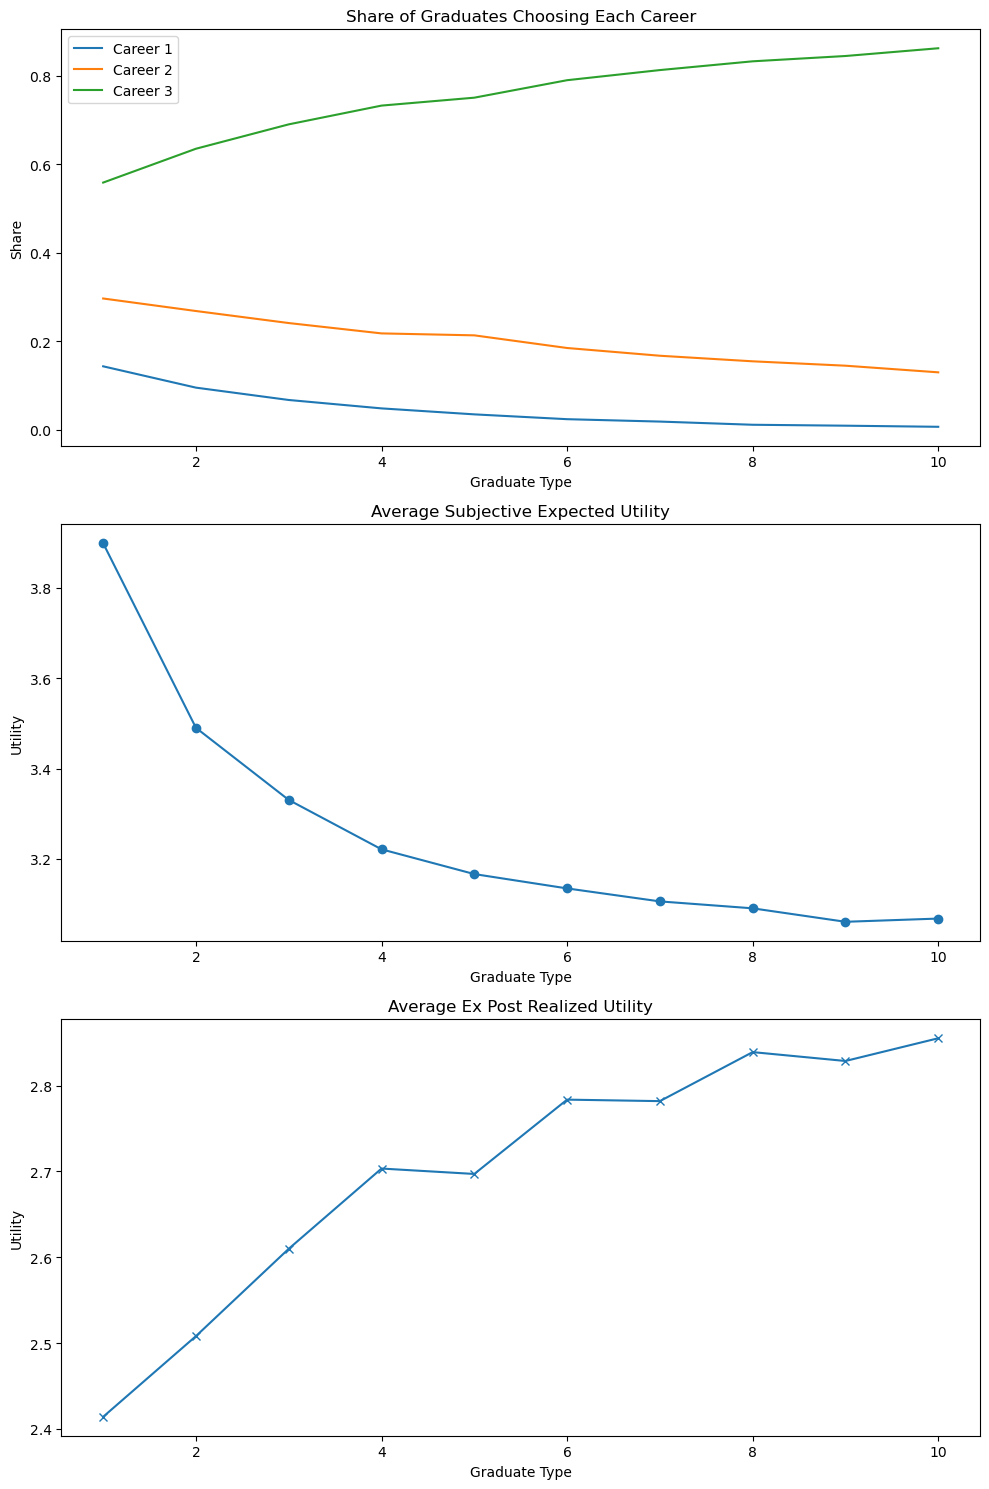

In [27]:
import matplotlib.pyplot as plt

#Creates simulation arrays
choices = np.zeros((par.N, par.J, par.K))  # Stores career choices
expected_utilities = np.zeros((par.N, par.K))  # Stores prior expected utilities
realized_utilities = np.zeros((par.N, par.K))  # Stores realized utilities

#Runs simulation
for i in range(par.N):
    F_i = i + 1  # Number of friends is equal to graduate index + 1
    for k in range(par.K):
        # Draws epsilon values for friends and the graduate themselves
        epsilon_friends = np.random.normal(0, par.sigma, (F_i, par.J))
        epsilon_graduate = np.random.normal(0, par.sigma, (1, par.J))

        # Calculates prior expected utility based on friends information
        prior_expected_utility = (par.v + np.mean(epsilon_friends, axis=0)).reshape(1, par.J)

#Chooses the career with the highest expected utility
        chosen_career = np.argmax(prior_expected_utility)

#Stores choice, prior expected utility, and realized utility
        choices[i, chosen_career, k] = 1
        expected_utilities[i, k] = prior_expected_utility[0, chosen_career]
        realized_utilities[i, k] = par.v[chosen_career] + epsilon_graduate[0, chosen_career]

#Calculates statistics
career_choices_shares = np.mean(choices, axis=2)
average_expected_utilities = np.mean(expected_utilities, axis=1)
average_realized_utilities = np.mean(realized_utilities, axis=1)

#Visualizes results
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for j in range(par.J):
    axes[0].plot(range(1, par.N + 1), career_choices_shares[:, j], label=f'Career {j+1}')
axes[0].set_title('Share of Graduates Choosing Each Career')
axes[0].set_xlabel('Graduate Type')
axes[0].set_ylabel('Share')
axes[0].legend()
axes[1].plot(range(1, par.N + 1), average_expected_utilities, marker='o')
axes[1].set_title('Average Subjective Expected Utility')
axes[1].set_xlabel('Graduate Type')
axes[1].set_ylabel('Utility')

axes[2].plot(range(1, par.N + 1), average_realized_utilities, marker='x')
axes[2].set_title('Average Ex Post Realized Utility')
axes[2].set_xlabel('Graduate Type')
axes[2].set_ylabel('Utility')

plt.tight_layout()
plt.show()

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

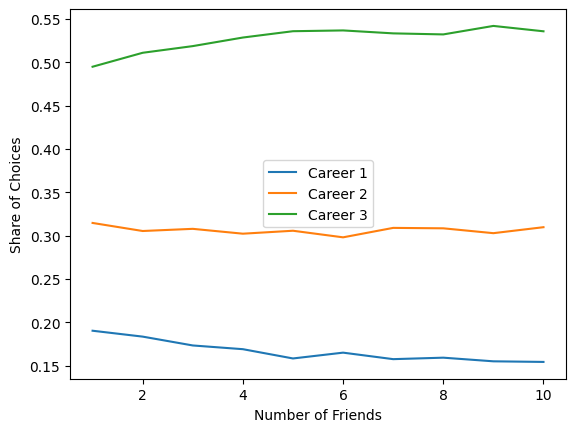

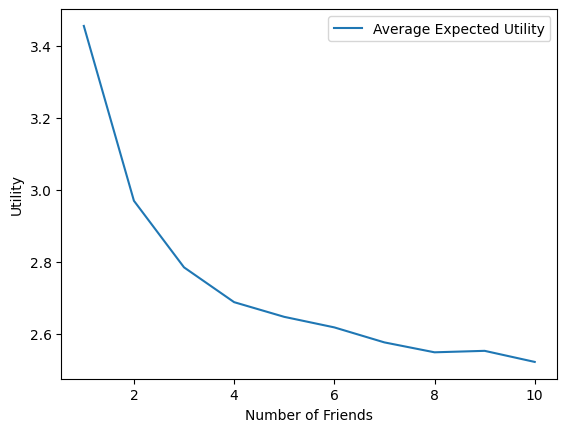

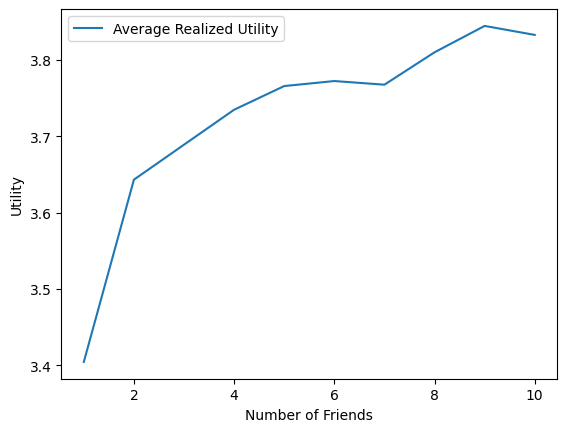

In [ ]:

def simulate_graduates(par):
    np.random.seed(42)
    
    career_choices = np.zeros((par.N, par.K), dtype=int)
    avg_expected_utilities = np.zeros(par.N)
    avg_realized_utilities = np.zeros(par.N)
    
    for i in range(par.N):
        Fi = i + 1
        for k in range(par.K):
            # Draw epsilon values for friends
            friends_epsilon = np.random.normal(0, par.sigma, (Fi, par.J))
            # Calculate prior expected utility from friends' information
            prior_expected_utilities = par.v + np.mean(friends_epsilon, axis=0)
            
            # Draw epsilon values for the graduate
            personal_epsilon = np.random.normal(0, par.sigma, par.J)
            # Calculate personal expected utility
            personal_expected_utilities = prior_expected_utilities + personal_epsilon
            
            # Choose the career track with the highest expected utility
            chosen_career = np.argmax(personal_expected_utilities)
            career_choices[i, k] = chosen_career
            
            # Store the prior expected utility and realized utility
            avg_expected_utilities[i] += prior_expected_utilities[chosen_career]
            avg_realized_utilities[i] += par.v[chosen_career] + personal_epsilon[chosen_career]
        
        avg_expected_utilities[i] /= par.K
        avg_realized_utilities[i] /= par.K
    
    # Visualize the share of graduates choosing each career
    for j in range(par.J):
        share_of_choices = np.mean(career_choices == j, axis=1)
        plt.plot(np.arange(1, par.N + 1), share_of_choices, label=f'Career {j+1}')
    
    plt.xlabel('Number of Friends')
    plt.ylabel('Share of Choices')
    plt.legend()
    plt.show()
    
    # Visualize the average subjective expected utility
    plt.plot(np.arange(1, par.N + 1), avg_expected_utilities, label='Average Expected Utility')
    plt.xlabel('Number of Friends')
    plt.ylabel('Utility')
    plt.legend()
    plt.show()
    
    # Visualize the average realized utility
    plt.plot(np.arange(1, par.N + 1), avg_realized_utilities, label='Average Realized Utility')
    plt.xlabel('Number of Friends')
    plt.ylabel('Utility')
    plt.legend()
    plt.show()

simulate_graduates(par)


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

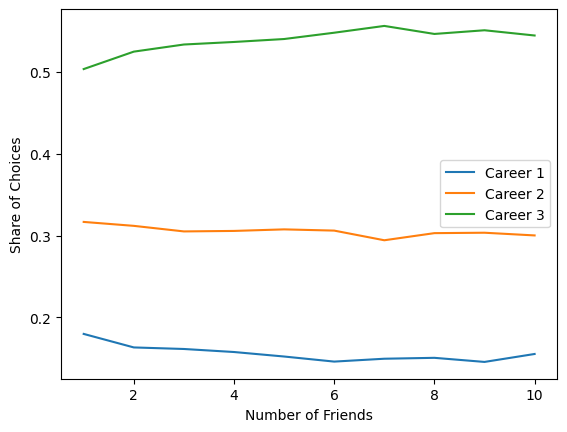

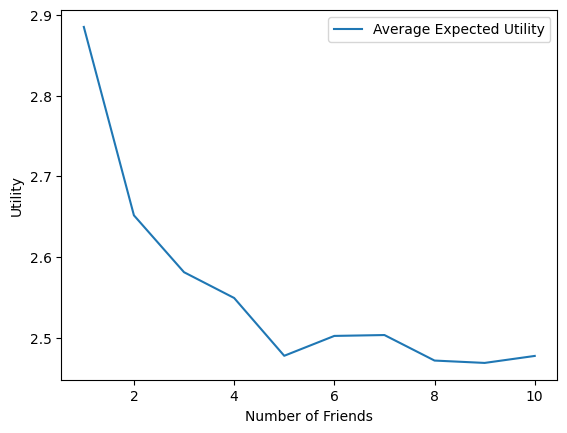

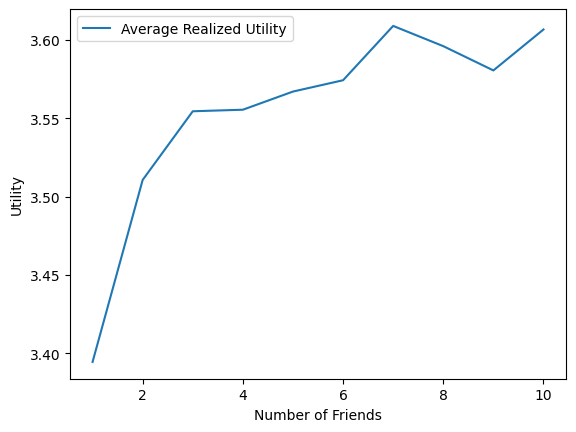

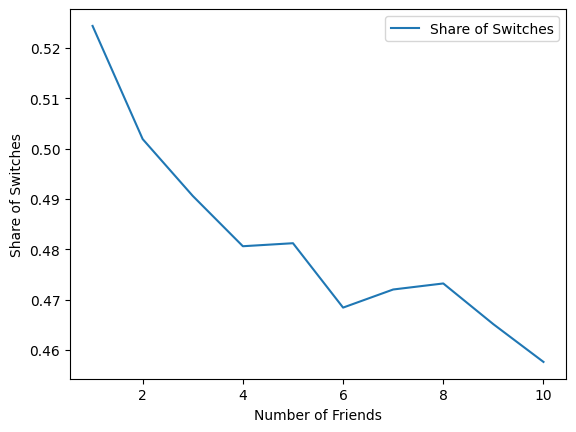

In [ ]:
def simulate_graduates_with_switching(par):
    np.random.seed(42)
    
    # First round of career choices
    career_choices = np.zeros((par.N, par.K), dtype=int)
    avg_expected_utilities = np.zeros(par.N)
    avg_realized_utilities = np.zeros(par.N)
    
    for i in range(par.N):
        Fi = i + 1
        for k in range(par.K):
            # Draw epsilon values for friends
            friends_epsilon = np.random.normal(0, par.sigma, (Fi, par.J))
            # Calculate prior expected utility from friends' information
            prior_expected_utilities = par.v + np.mean(friends_epsilon, axis=0)
            
            # Draw epsilon values for the graduate
            personal_epsilon = np.random.normal(0, par.sigma, par.J)
            # Calculate personal expected utility
            personal_expected_utilities = prior_expected_utilities + personal_epsilon
            
            # Choose the career track with the highest expected utility
            chosen_career = np.argmax(personal_expected_utilities)
            career_choices[i, k] = chosen_career
            
            # Store the prior expected utility and realized utility
            avg_expected_utilities[i] += prior_expected_utilities[chosen_career]
            avg_realized_utilities[i] += par.v[chosen_career] + personal_epsilon[chosen_career]
        
        avg_expected_utilities[i] /= par.K
        avg_realized_utilities[i] /= par.K
    
    # After learning the true utility, graduates decide whether to switch
    new_career_choices = np.zeros((par.N, par.K), dtype=int)
    new_avg_expected_utilities = np.zeros(par.N)
    new_avg_realized_utilities = np.zeros(par.N)
    switches = np.zeros(par.N)
    
    for i in range(par.N):
        Fi = i + 1
        for k in range(par.K):
            initial_career = career_choices[i, k]
            true_utility = par.v[initial_career] + np.random.normal(0, par.sigma)
            
            # Draw epsilon values for friends
            friends_epsilon = np.random.normal(0, par.sigma, (Fi, par.J))
            # Calculate prior expected utility from friends' information
            prior_expected_utilities = par.v + np.mean(friends_epsilon, axis=0)
            
            # Calculate new expected utilities with switching cost
            new_expected_utilities = np.copy(prior_expected_utilities)
            for j in range(par.J):
                if j == initial_career:
                    new_expected_utilities[j] = true_utility
                else:
                    new_expected_utilities[j] -= par.c
            
            # Draw new epsilon values for the graduate
            personal_epsilon = np.random.normal(0, par.sigma, par.J)
            # Calculate personal expected utility
            personal_expected_utilities = new_expected_utilities + personal_epsilon
            
            # Choose the new career track with the highest expected utility
            new_chosen_career = np.argmax(personal_expected_utilities)
            new_career_choices[i, k] = new_chosen_career
            
            if new_chosen_career != initial_career:
                switches[i] += 1
            
            # Store the new prior expected utility and realized utility
            new_avg_expected_utilities[i] += new_expected_utilities[new_chosen_career]
            new_avg_realized_utilities[i] += par.v[new_chosen_career] + personal_epsilon[new_chosen_career]
        
        new_avg_expected_utilities[i] /= par.K
        new_avg_realized_utilities[i] /= par.K
        switches[i] /= par.K
    
    # Visualize the share of graduates choosing each career after considering switching
    for j in range(par.J):
        share_of_choices = np.mean(new_career_choices == j, axis=1)
        plt.plot(np.arange(1, par.N + 1), share_of_choices, label=f'Career {j+1}')
    
    plt.xlabel('Number of Friends')
    plt.ylabel('Share of Choices')
    plt.legend()
    plt.show()
    
    # Visualize the average subjective expected utility after considering switching
    plt.plot(np.arange(1, par.N + 1), new_avg_expected_utilities, label='Average Expected Utility')
    plt.xlabel('Number of Friends')
    plt.ylabel('Utility')
    plt.legend()
    plt.show()
    
    # Visualize the average realized utility after considering switching
    plt.plot(np.arange(1, par.N + 1), new_avg_realized_utilities, label='Average Realized Utility')
    plt.xlabel('Number of Friends')
    plt.ylabel('Utility')
    plt.legend()
    plt.show()
    
    # Visualize the share of graduates that choose to switch
    plt.plot(np.arange(1, par.N + 1), switches, label='Share of Switches')
    plt.xlabel('Number of Friends')
    plt.ylabel('Share of Switches')
    plt.legend()
    plt.show()

simulate_graduates_with_switching(par)


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [ ]:
def find_point(X, y, condition):
    distances = np.sqrt((X[:, 0] - y[0])**2 + (X[:, 1] - y[1])**2)
    filtered_indices = np.where(condition(X, y))[0]
    if len(filtered_indices) == 0:
        return None
    closest_index = filtered_indices[np.argmin(distances[filtered_indices])]
    return X[closest_index]

# Define conditions for A, B, C, and D
cond_A = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] > y[1])
cond_B = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] < y[1])
cond_C = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] < y[1])
cond_D = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] > y[1])

# Find points A, B, C, and D
A = find_point(X, y, cond_A)
B = find_point(X, y, cond_B)
C = find_point(X, y, cond_C)
D = find_point(X, y, cond_D)

print("A:", A)
print("B:", B)
print("C:", C)
print("D:", D)

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]


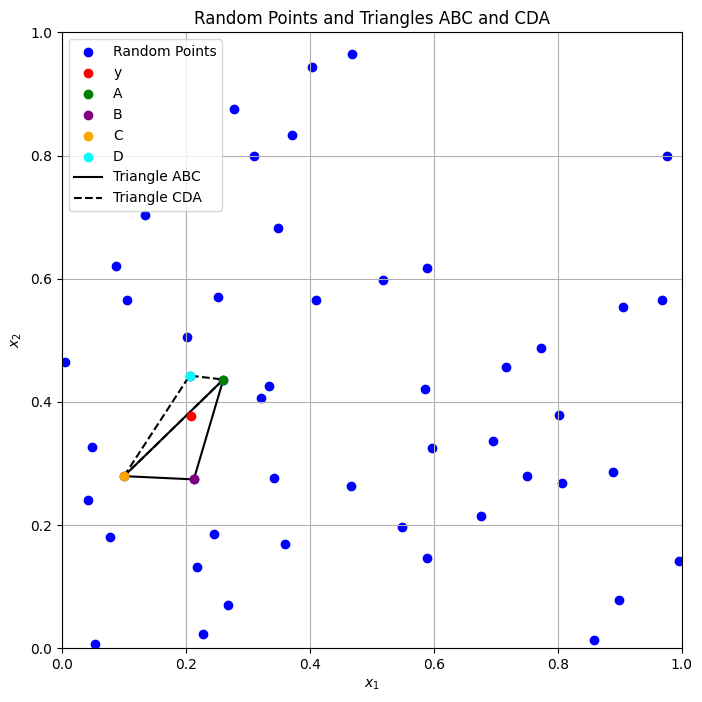

In [ ]:
# Plot the points and triangles
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Random Points')
plt.scatter(y[0], y[1], c='red', label='y', zorder=5)
plt.scatter(A[0], A[1], c='green', label='A', zorder=5)
plt.scatter(B[0], B[1], c='purple', label='B', zorder=5)
plt.scatter(C[0], C[1], c='orange', label='C', zorder=5)
plt.scatter(D[0], D[1], c='cyan', label='D', zorder=5)

# Draw triangles ABC and CDA
if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'k-', label='Triangle ABC')
if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'k--', label='Triangle CDA')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.title('Random Points and Triangles ABC and CDA')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.show()


**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
def barycentric_coordinates(y, A, B, C):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    if denom == 0:
        return None, None, None  # Degenerate triangle
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Compute barycentric coordinates for y with respect to ABC
r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(y, A, B, C)
print("Barycentric coordinates w.r.t. ABC:", r1_ABC, r2_ABC, r3_ABC)

# Compute barycentric coordinates for y with respect to CDA
r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(y, C, D, A)
print("Barycentric coordinates w.r.t. CDA:", r1_CDA, r2_CDA, r3_CDA)

# Check which triangle y is inside
def is_inside_triangle(r1, r2, r3):
    return 0 <= r1 <= 1 and 0 <= r2 <= 1 and 0 <= r3 <= 1

inside_ABC = is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)
inside_CDA = is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)

if inside_ABC:
    print("Point y is inside triangle ABC.")
elif inside_CDA:
    print("Point y is inside triangle CDA.")
else:
    print("Point y is outside both triangles ABC and CDA.")


Barycentric coordinates w.r.t. ABC: 0.6286263152916166 0.06910145494351515 0.3022722297648682
Barycentric coordinates w.r.t. CDA: 0.3682598757102867 -0.13392661883334067 0.765666743123054
Point y is inside triangle ABC.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
#Compute the approximation of f(y) using the barycentric coordinates
f_approx = None
if inside_ABC:
    f_approx = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
    print("Point y is inside triangle ABC.")
elif inside_CDA:
    f_approx = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
    print("Point y is inside triangle CDA.")
else:
    print("Point y is outside both triangles ABC and CDA.")

# Compute the true value of f(y)
f_true = f(y)

print("Approximate value of f(y):", f_approx)
print("True value of f(y):", f_true)

Point y is inside triangle ABC.
Approximate value of f(y): 0.08405201731052576
True value of f(y): 0.0789565216259594


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [ ]:
# Iterate through each point in Y
results = []
for y in Y:
    # Find points A, B, C, and D for each y
    A = find_point(X, y, cond_A)
    B = find_point(X, y, cond_B)
    C = find_point(X, y, cond_C)
    D = find_point(X, y, cond_D)
    
    if A is None or B is None or C is None or D is None:
        results.append((y, None, None))
        continue
    
    # Compute barycentric coordinates
    r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(y, A, B, C)
    r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(y, C, D, A)
    
    # Determine which triangle y is inside
    inside_ABC = is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)
    inside_CDA = is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)
    
    # Approximate f(y) using barycentric interpolation
    f_approx = None
    if inside_ABC:
        f_approx = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
    elif inside_CDA:
        f_approx = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
    
    # Compute the true value of f(y)
    f_true = f(y)
    
    # Store the results
    results.append((y, f_true, f_approx))

# Print the results
for y, f_true, f_approx in results:
    print(f"Point y: {y}")
    print(f"True value of f(y): {f_true}")
    print(f"Approximate value of f(y): {f_approx}")
    print()

Point y: (0.2, 0.2)
True value of f(y): 0.04000000000000001
Approximate value of f(y): 0.04032631372248057

Point y: (0.8, 0.2)
True value of f(y): 0.16000000000000003
Approximate value of f(y): 0.15874233999349835

Point y: (0.8, 0.8)
True value of f(y): None
Approximate value of f(y): None

Point y: (0.8, 0.2)
True value of f(y): 0.16000000000000003
Approximate value of f(y): 0.15874233999349835

Point y: (0.5, 0.5)
True value of f(y): 0.25
Approximate value of f(y): 0.2512901561119622

